In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/thead/anaconda/envs/py35/lib/python3.5/site-packages/PIL/Image.py:85: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)
/Users/thead/anaconda/envs/py35/lib/python3.5/site-packages/PIL/Image.py:85: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
sns.set_style('whitegrid')

/Users/thead/anaconda/envs/py35/lib/python3.5/site-packages/PIL/Image.py:85: RuntimeWarning: The _imaging extension was built for another  version of Pillow or PIL
  warnings.warn(str(v), RuntimeWarning)


In [5]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [6]:
red_wine.shape

(1599, 12)

In [7]:
red_wine.head(3).T

,0,1,2
fixed acidity,7.4000,7.8000,7.800
volatile acidity,0.7000,0.8800,0.760
citric acid,0.0000,0.0000,0.040
residual sugar,1.9000,2.6000,2.300
chlorides,0.0760,0.0980,0.092
free sulfur dioxide,11.0000,25.0000,15.000
total sulfur dioxide,34.0000,67.0000,54.000
density,0.9978,0.9968,0.997
pH,3.5100,3.2000,3.260
sulphates,0.5600,0.6800,0.650


In [8]:
#red_wine.alcohol.plot.density?

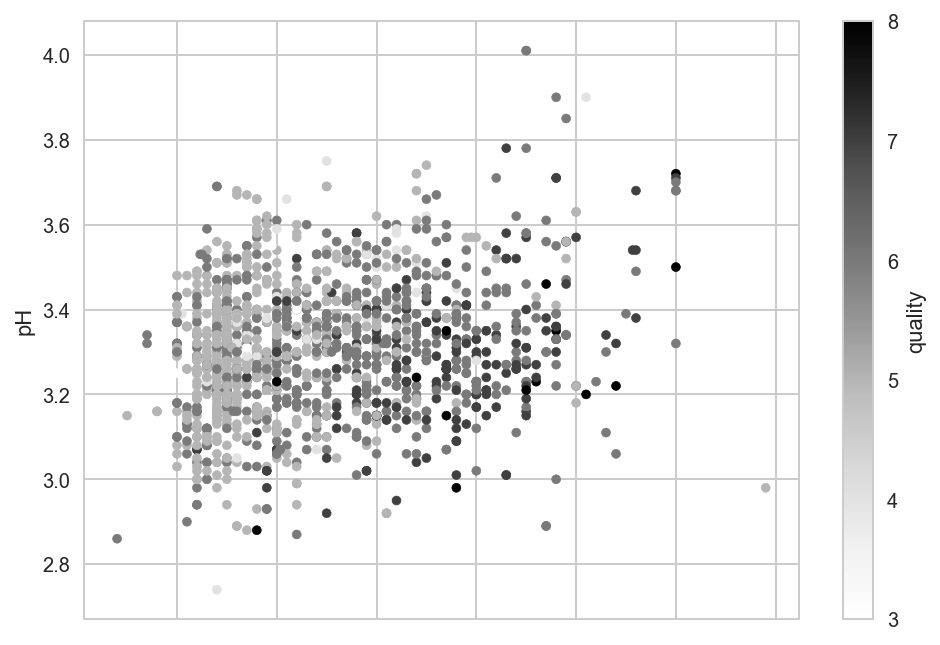

In [9]:
red_wine.plot.scatter('alcohol', 'pH', c='quality')

In [10]:
small_wine = red_wine.sample(300)

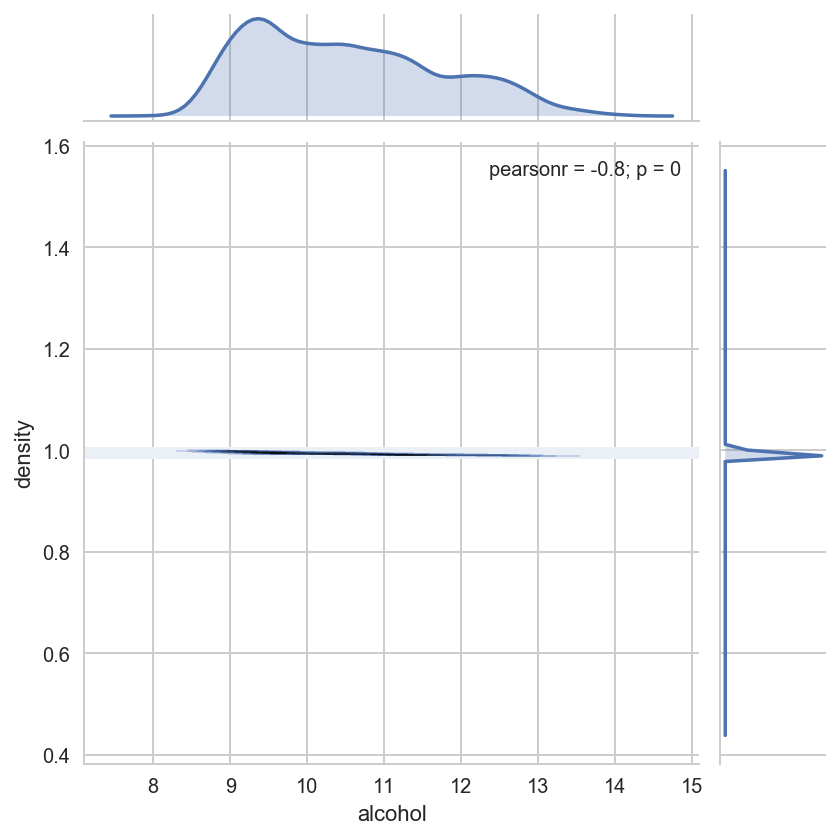

In [11]:
ax = sns.jointplot('alcohol', 'density', data=white_wine[white_wine.density<1.01], kind='kde')


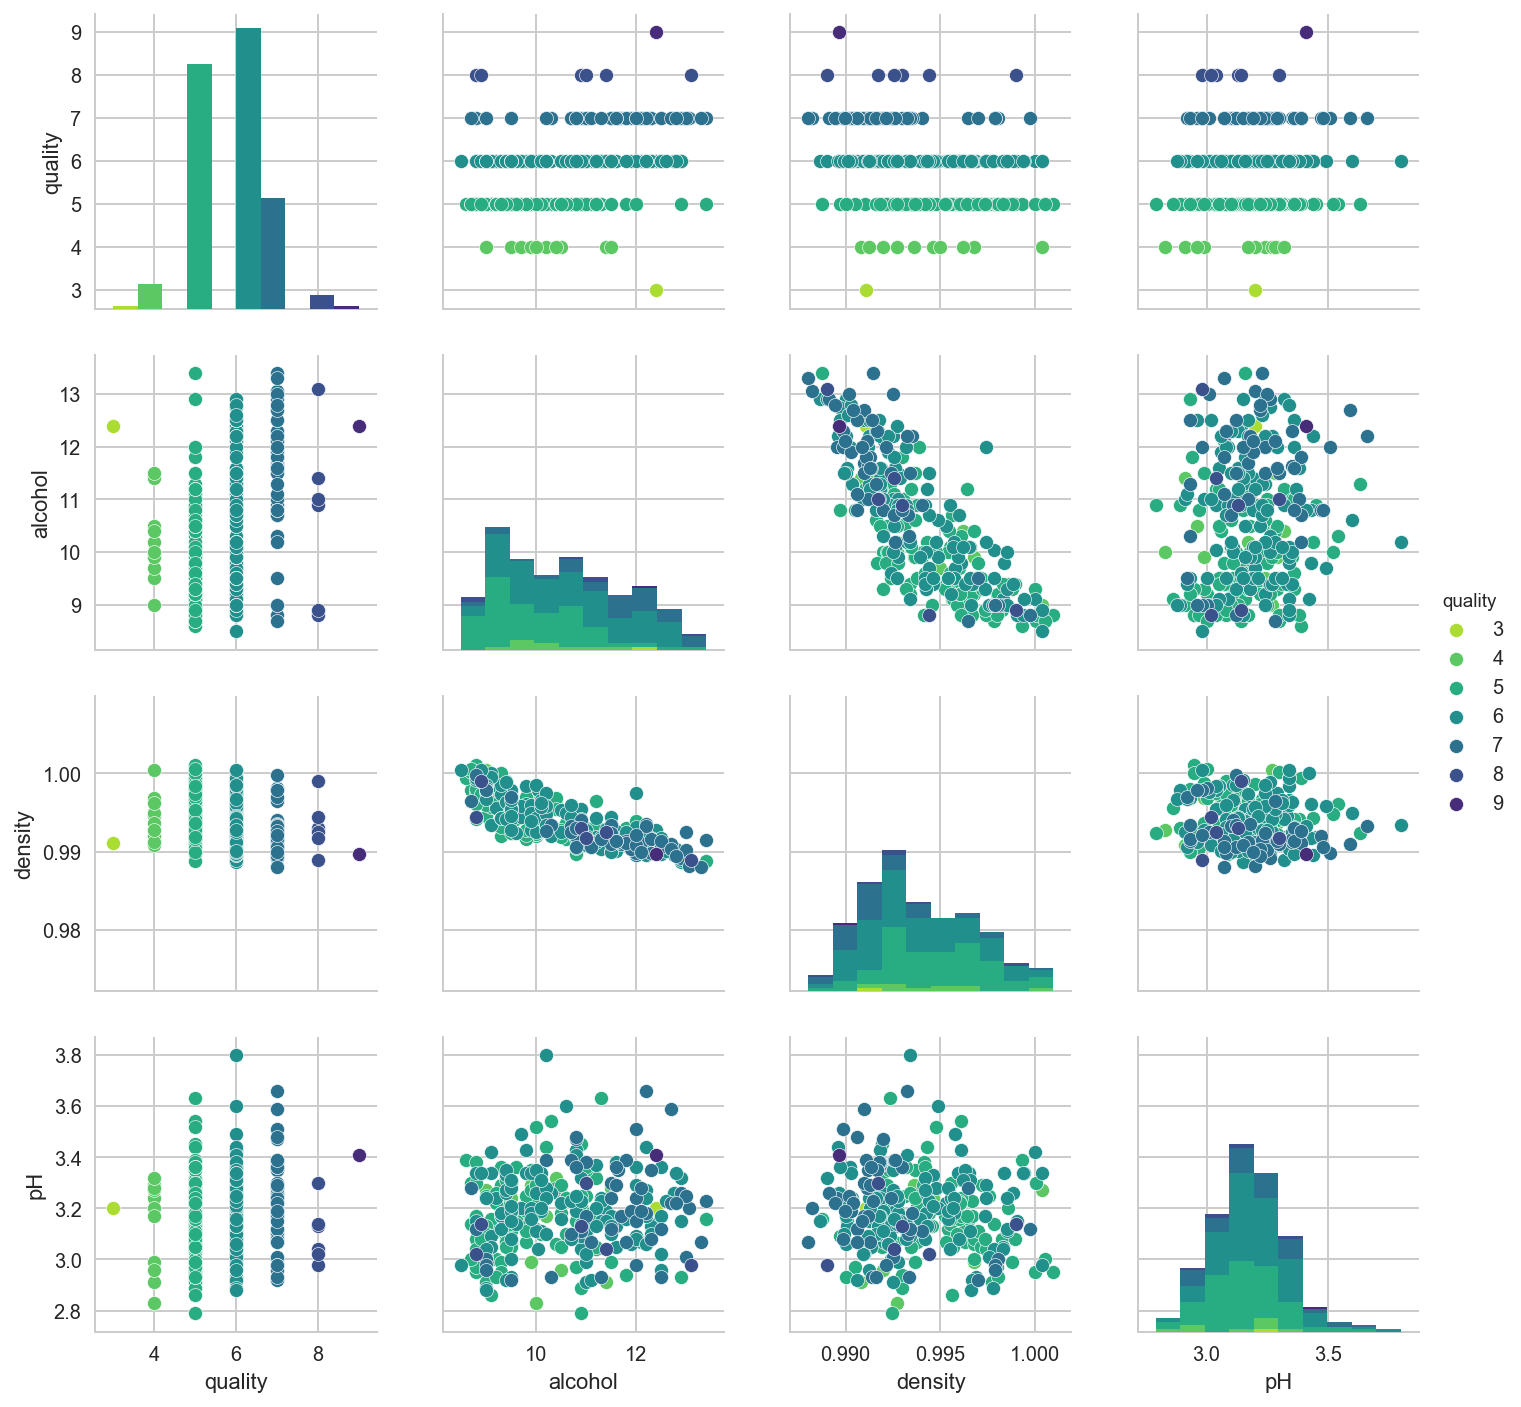

In [12]:
sns.pairplot(white_wine.sample(300),
             vars=['quality', 'alcohol', 'density', 'pH'],
             hue='quality', palette='viridis_r',
             diag_kws=dict());

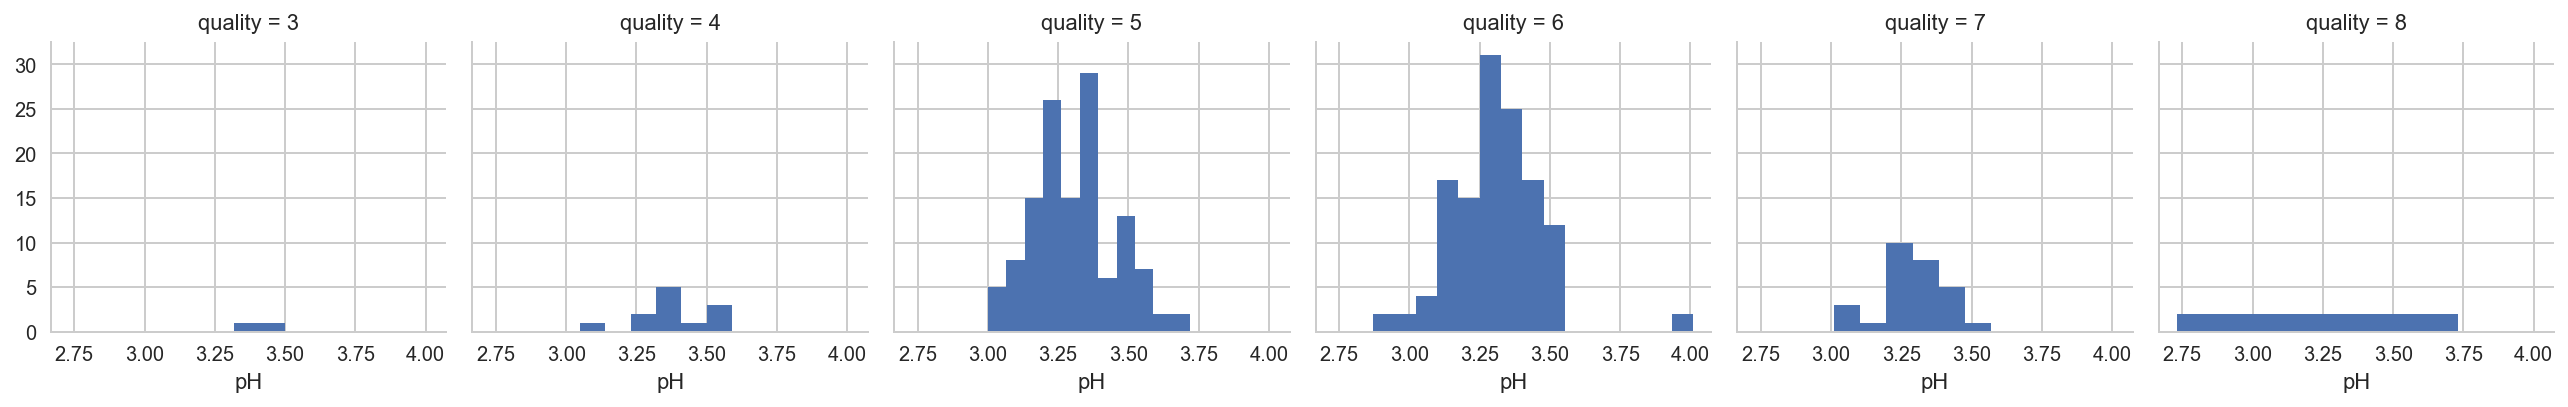

In [13]:
grid = sns.FacetGrid(small_wine, col="quality", col_wrap=6)
grid.map(plt.hist, "pH", bins='auto');

In [14]:
def plot_var(df, name, by='quality', ax=None):
    by_quality = df.groupby(by)
    low, high = df[name].min(), df[name].max()

    for q, group in by_quality:
        data = group[name]
        if len(data) < 50:
            continue
        data.hist(bins=20, normed=True,
                  histtype='step', range=(low, high),
                  lw=3,
                  label='quality=%i'%q)

    plt.xlabel(name)
    plt.legend(loc='best');

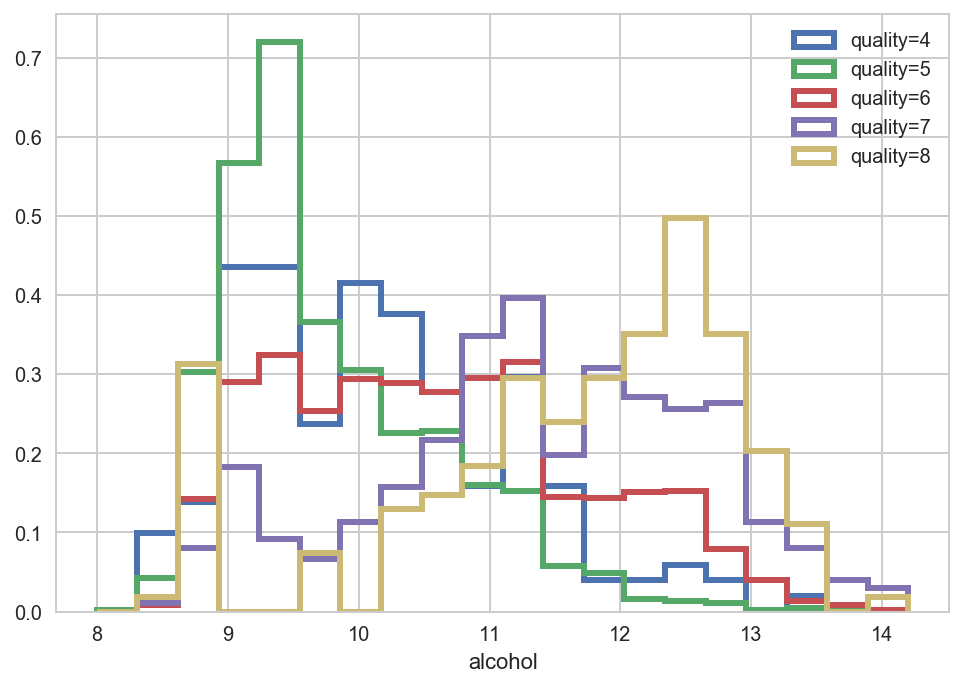

In [15]:
plot_var(white_wine, 'alcohol')

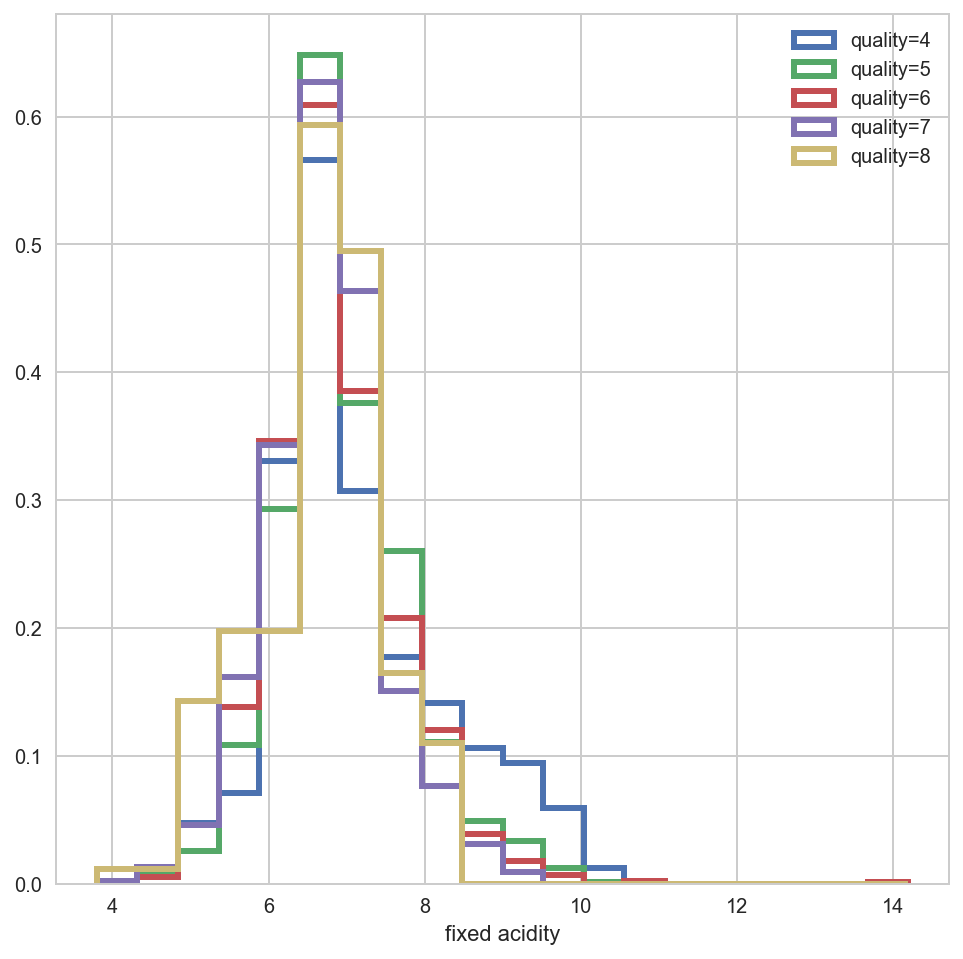

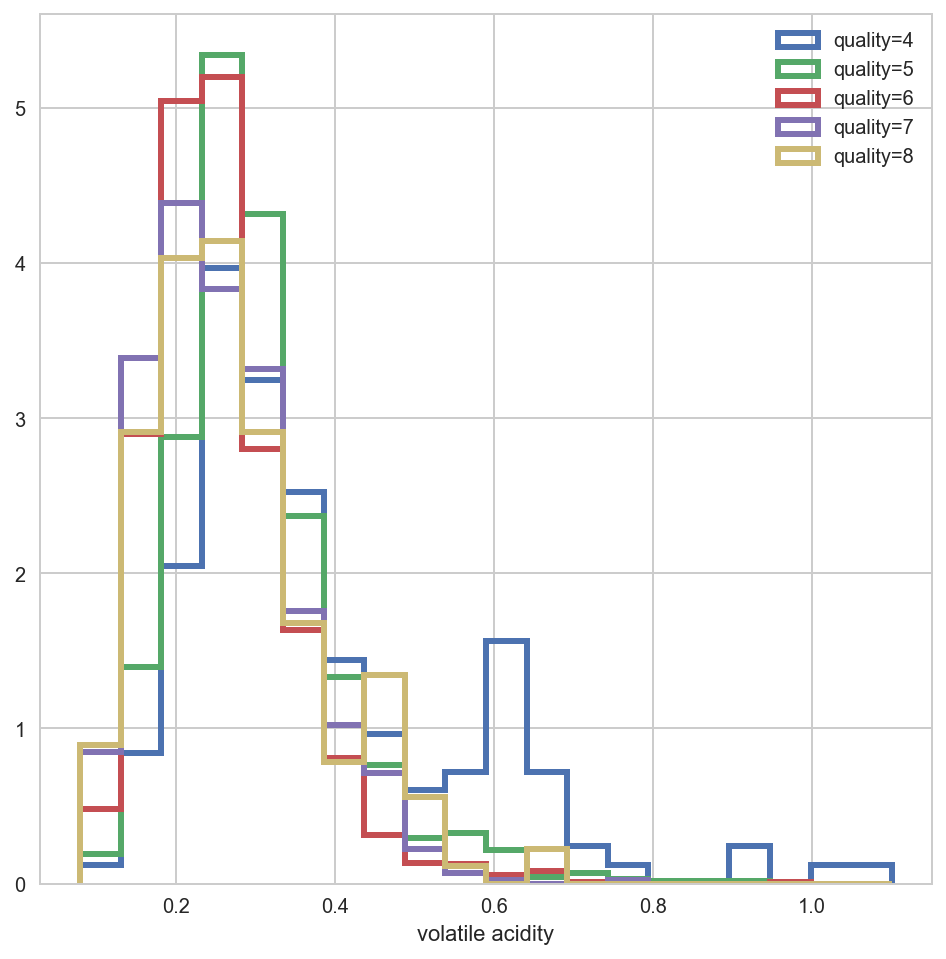

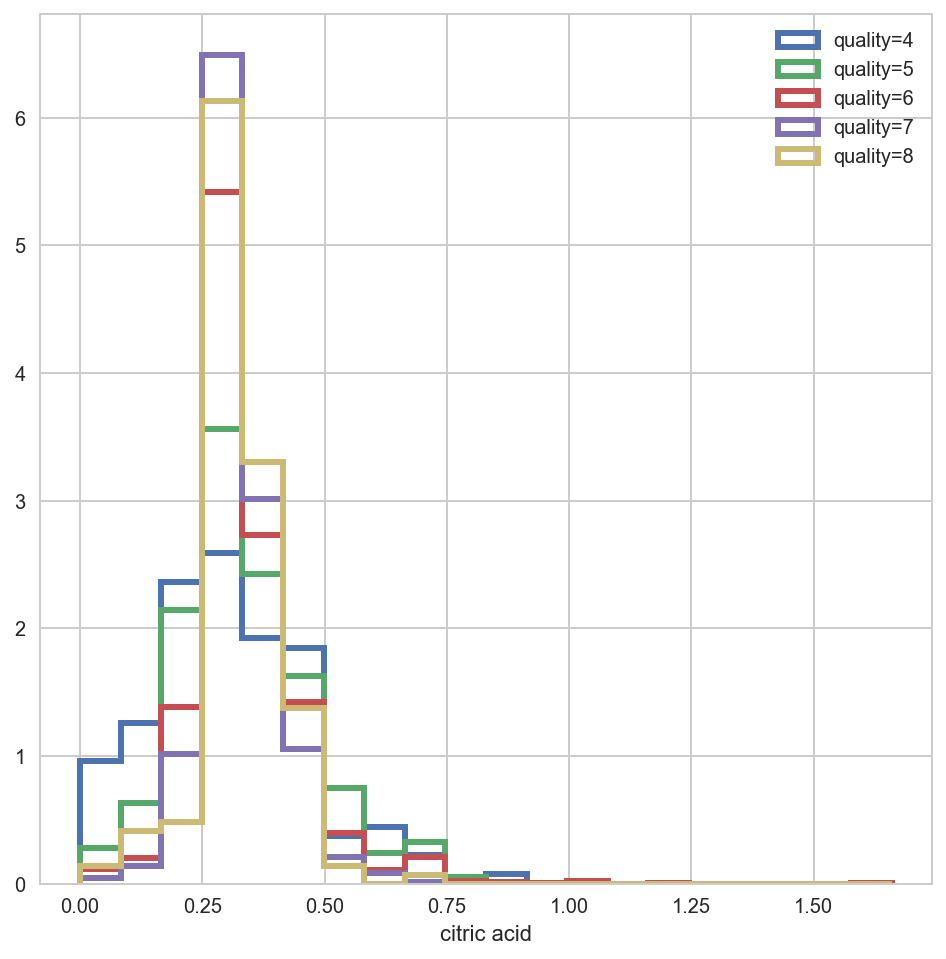

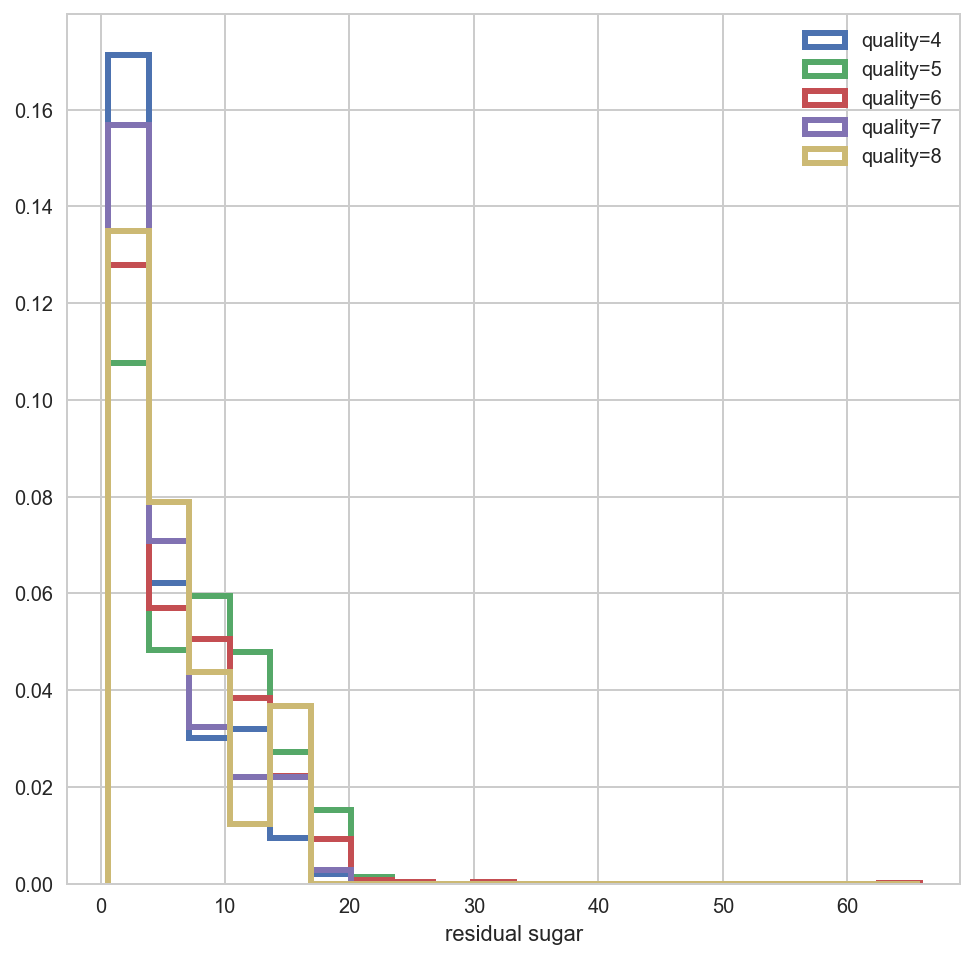

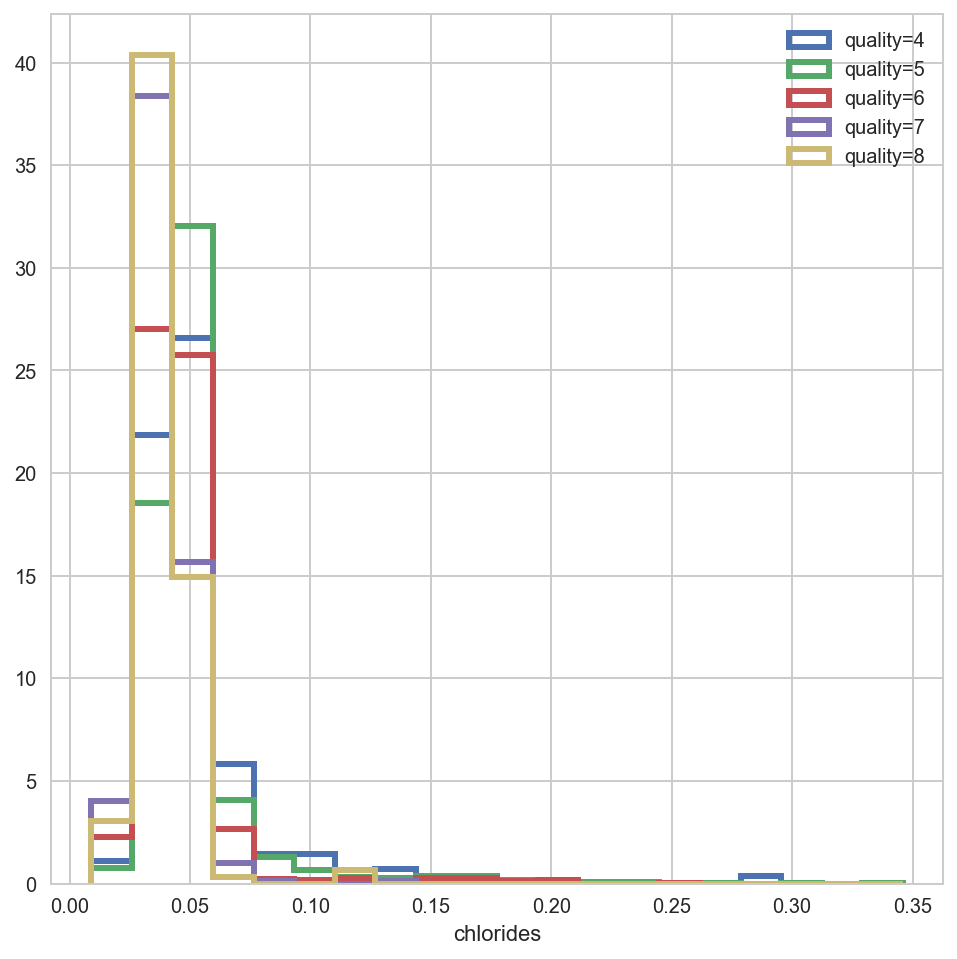

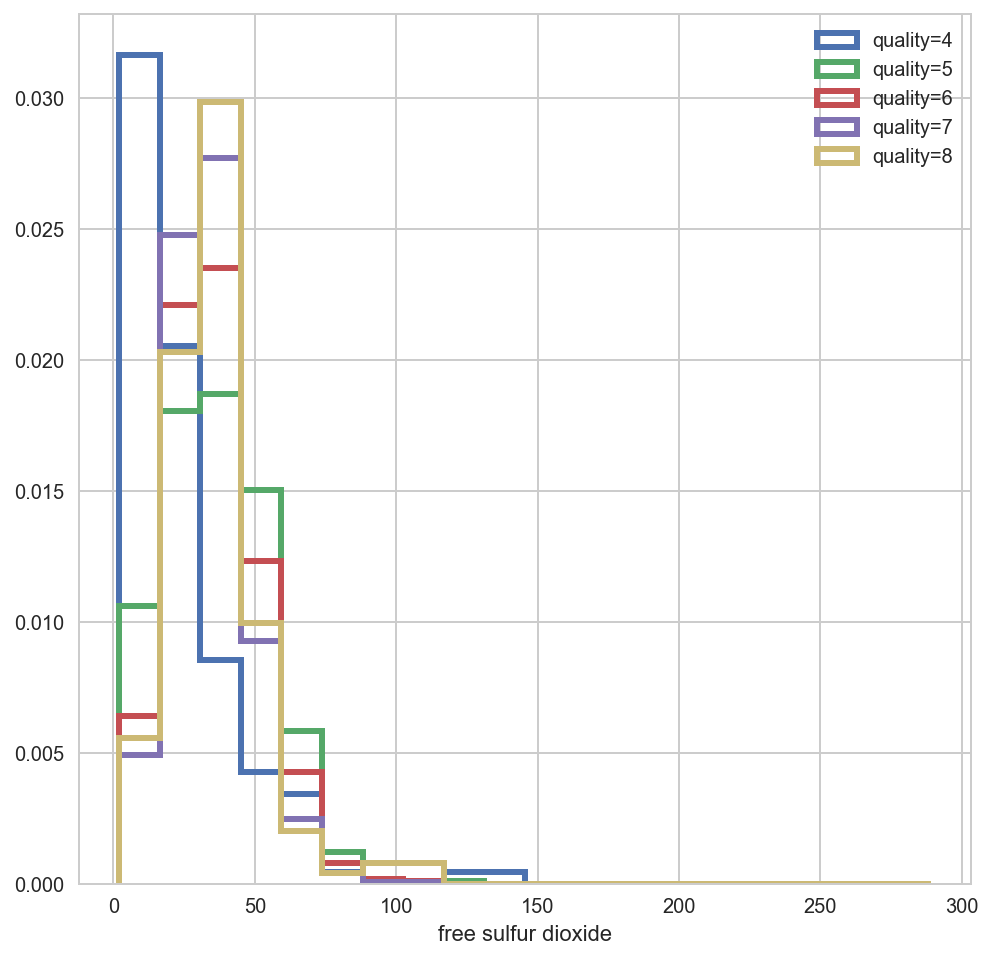

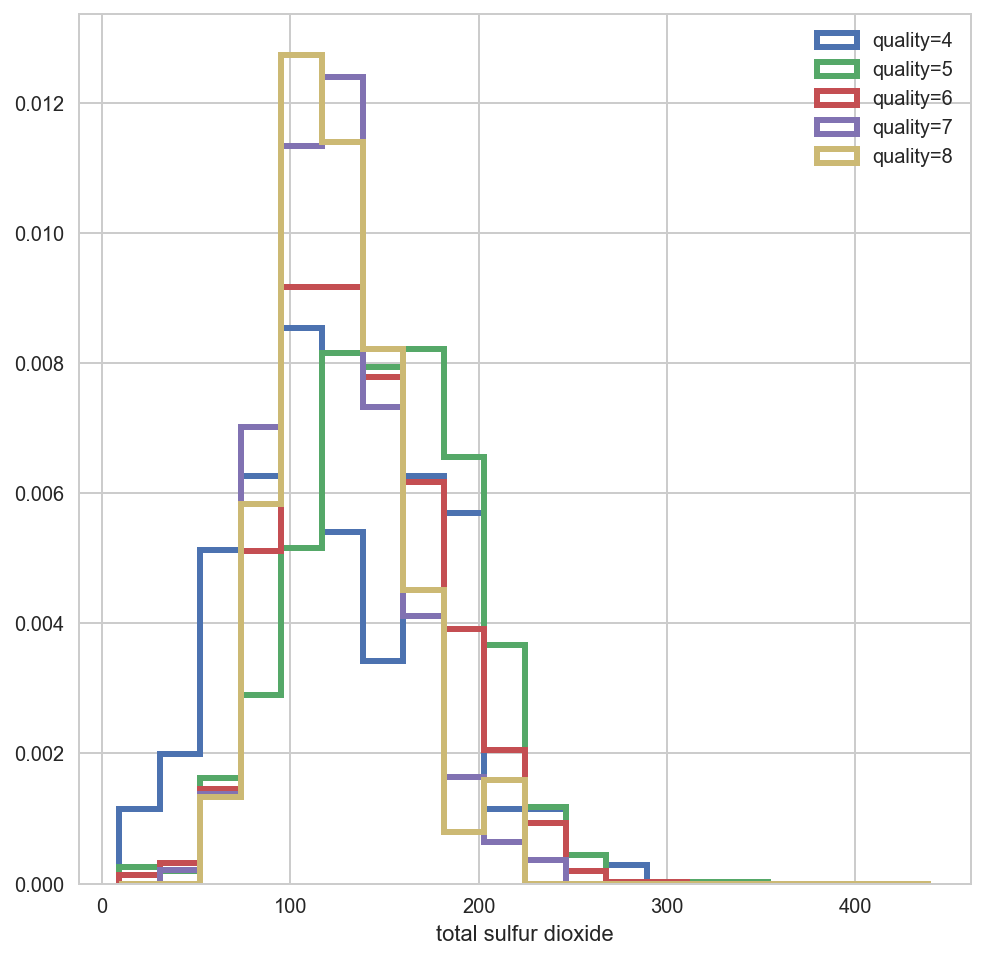

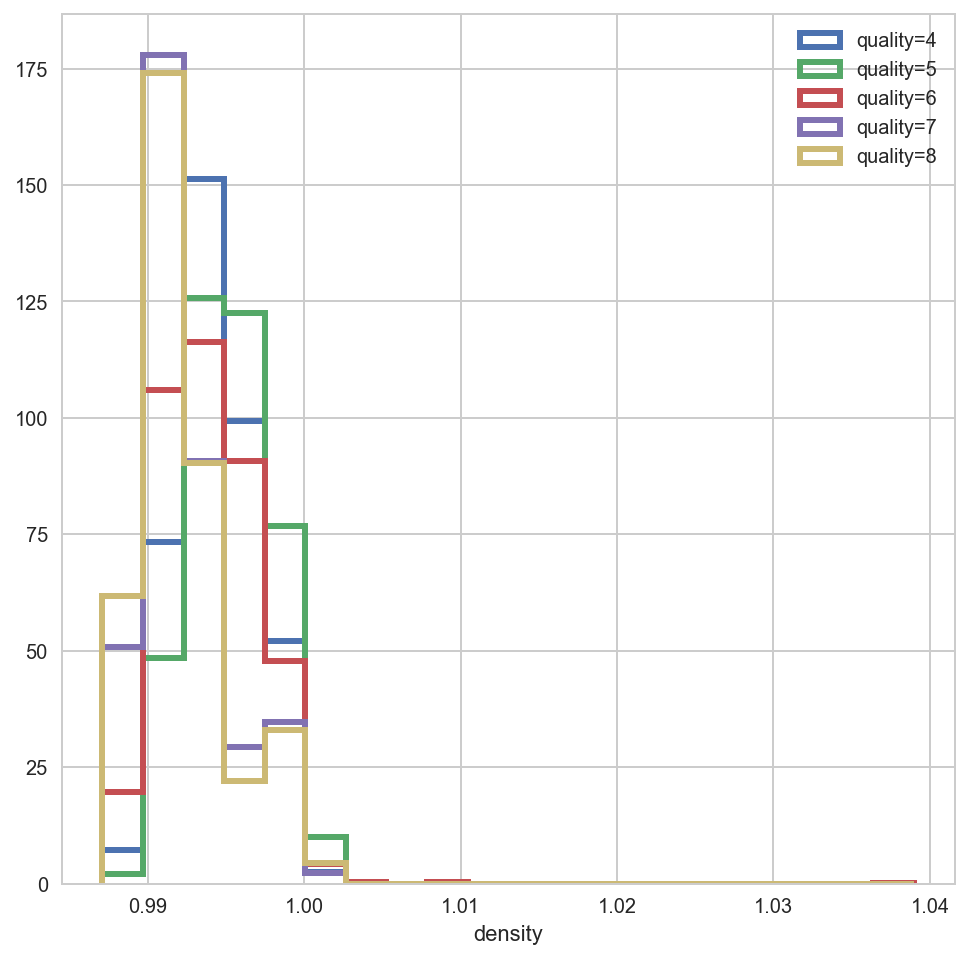

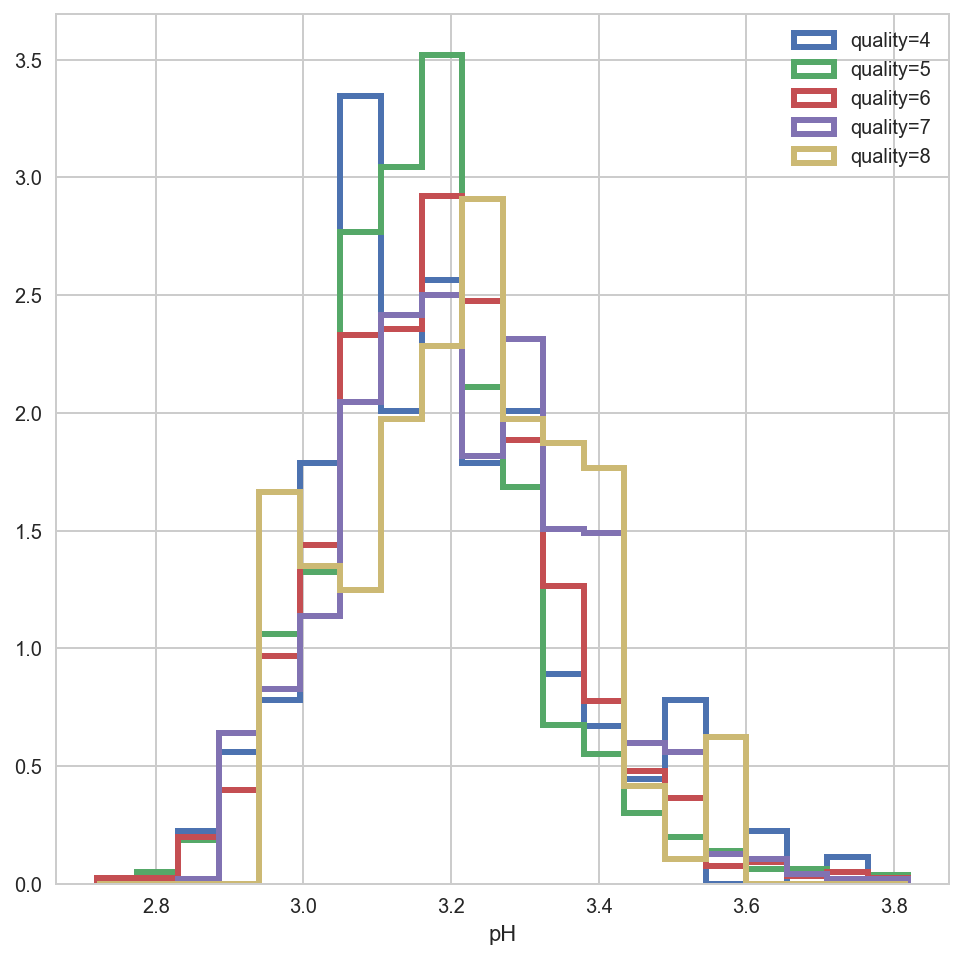

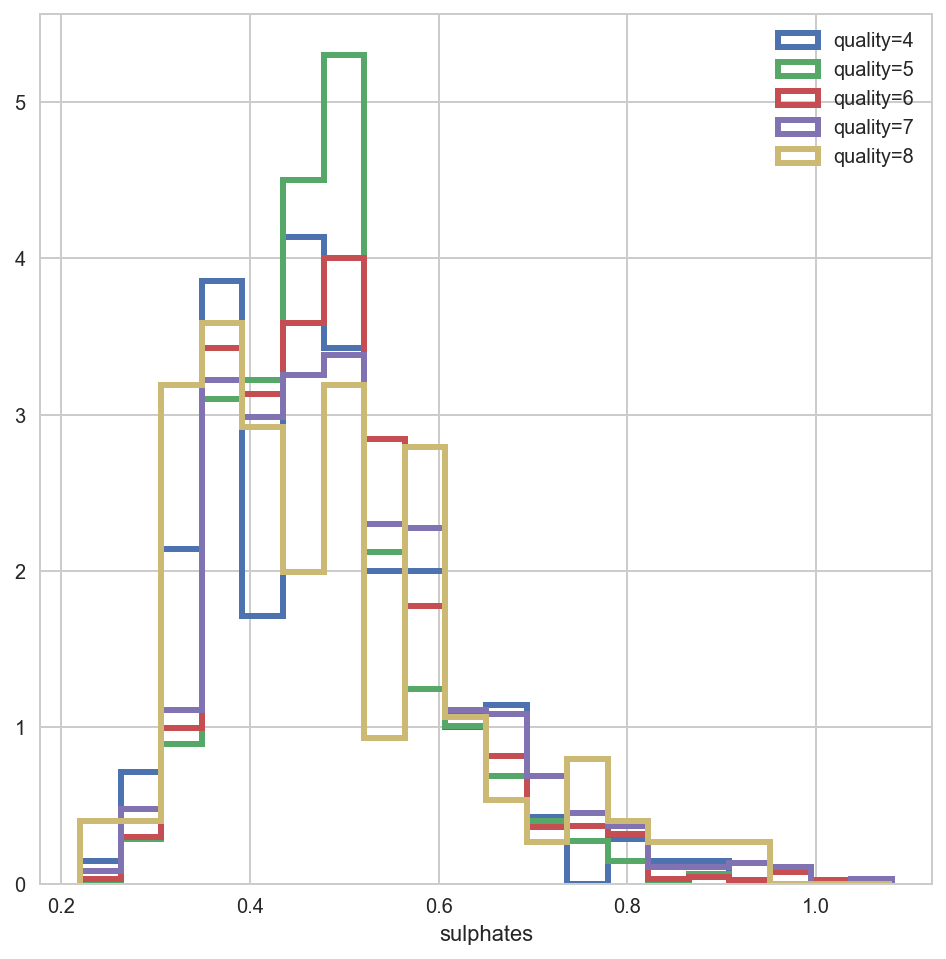

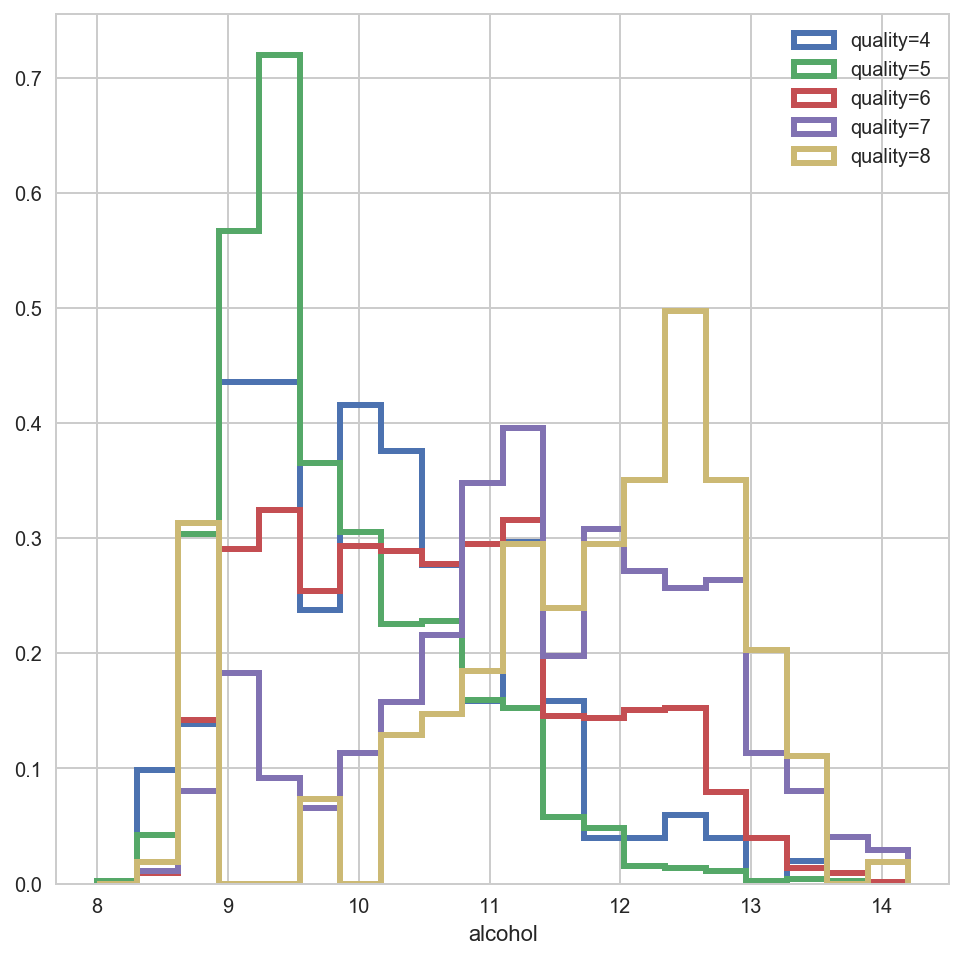

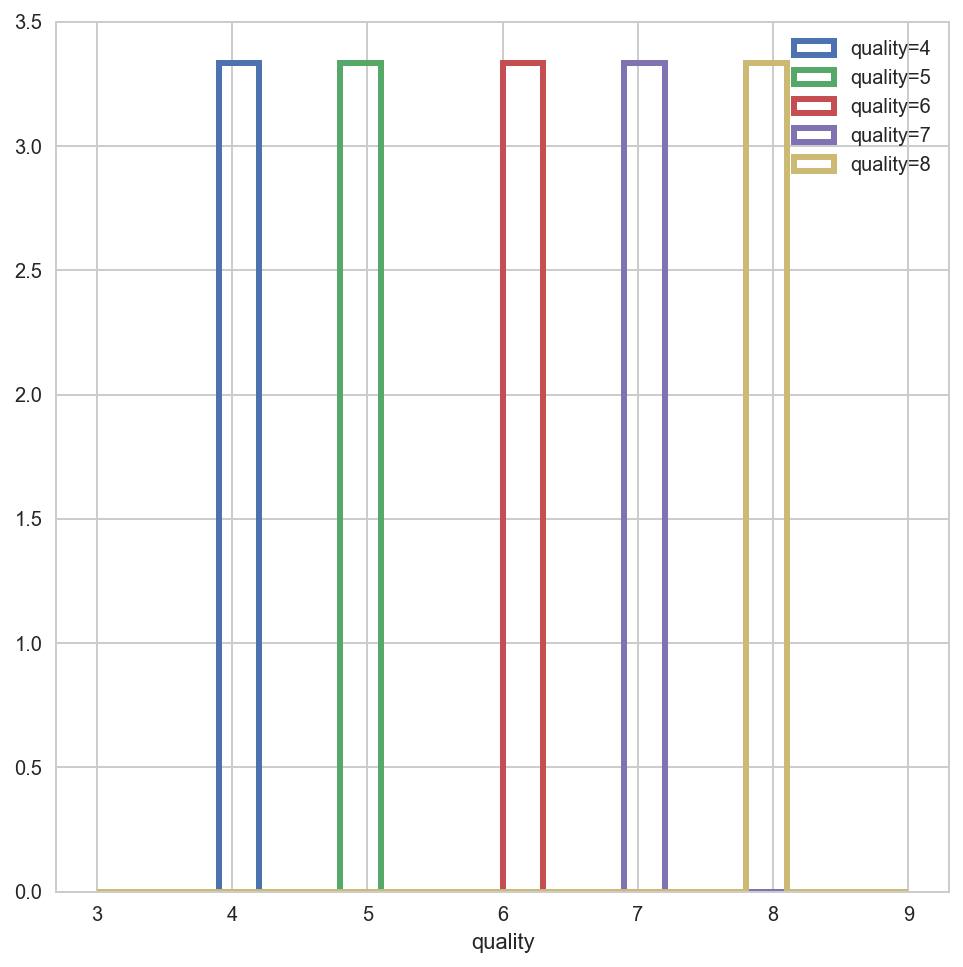

In [16]:
for col in white_wine.columns:
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    plot_var(white_wine, col, ax=ax)

In [17]:
white_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


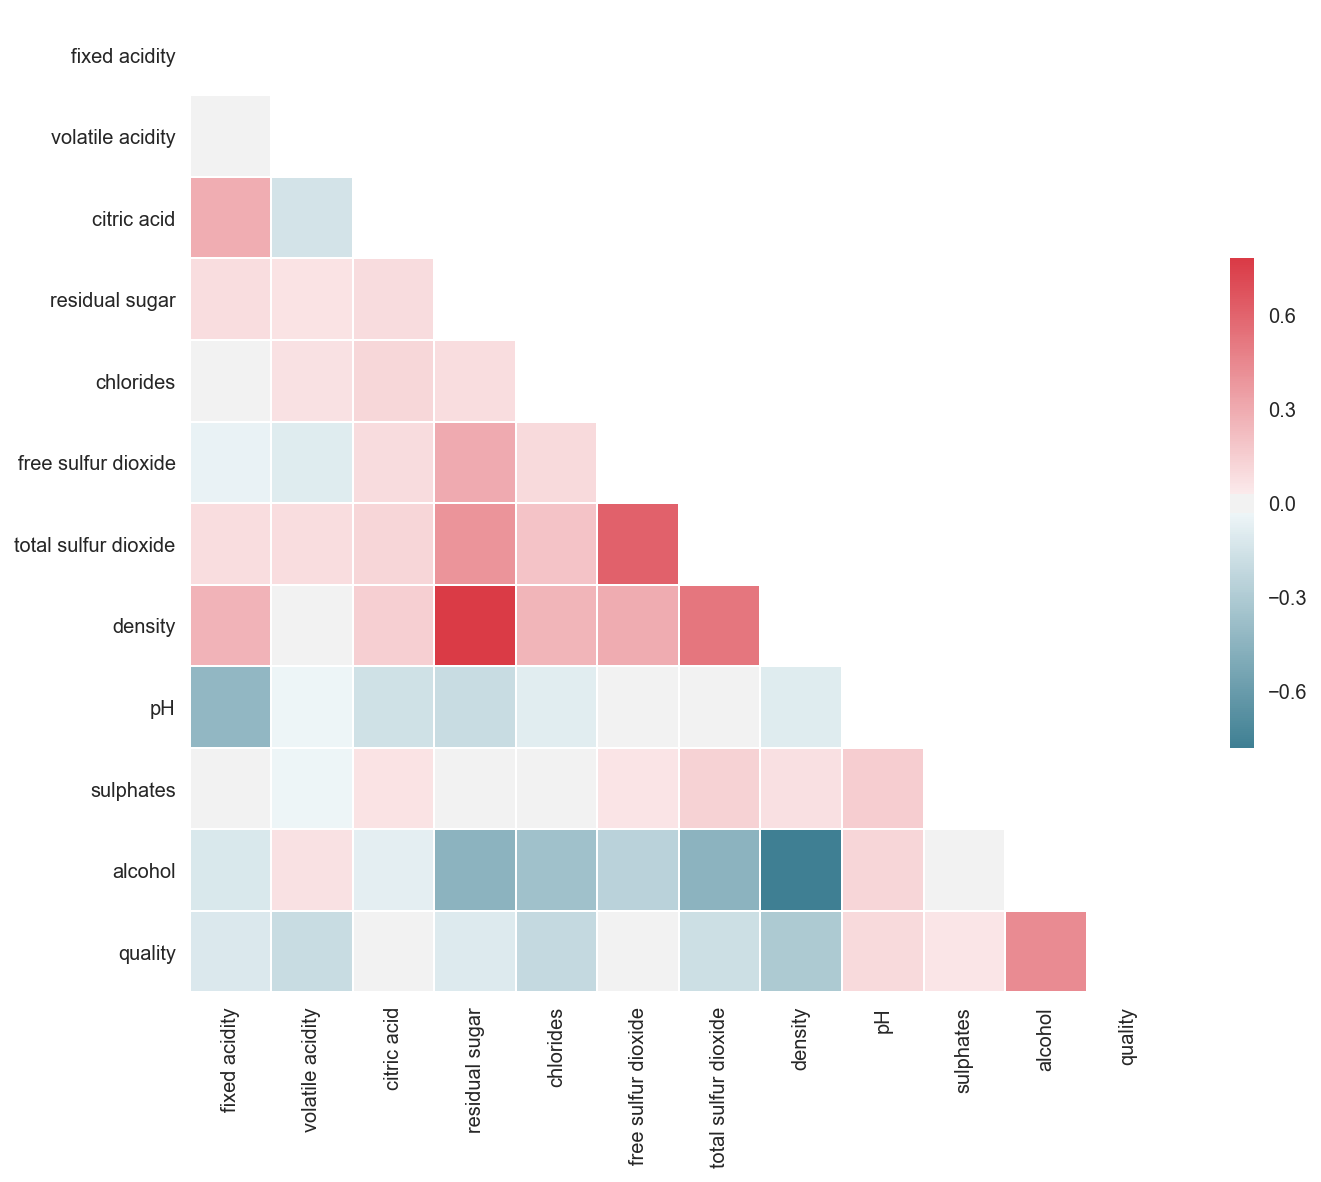

In [18]:
corr = white_wine.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

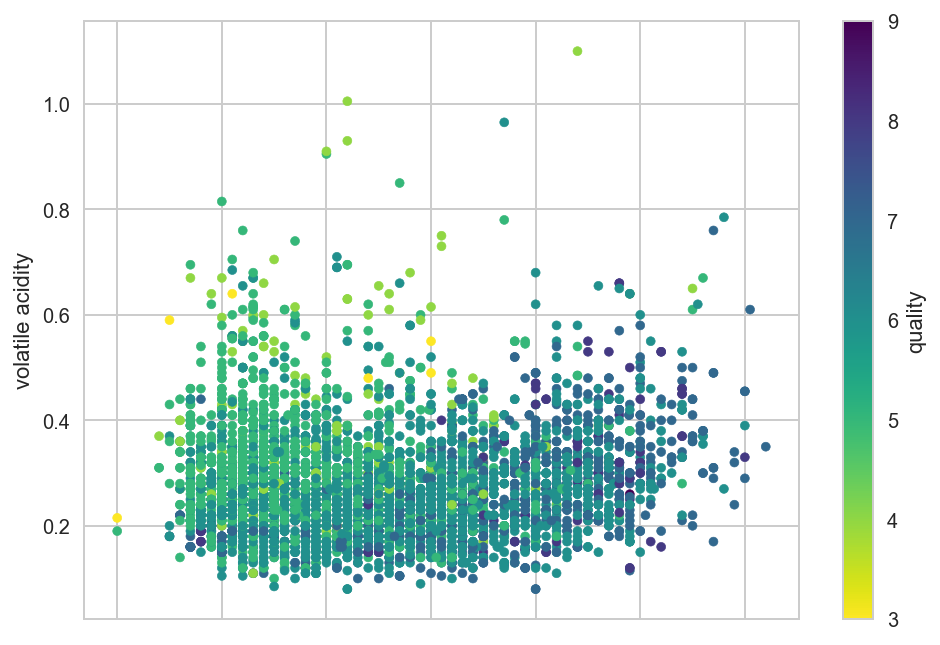

In [19]:
white_wine.plot.scatter('alcohol', 'volatile acidity', c='quality',
                        cmap='viridis_r', marker='o');

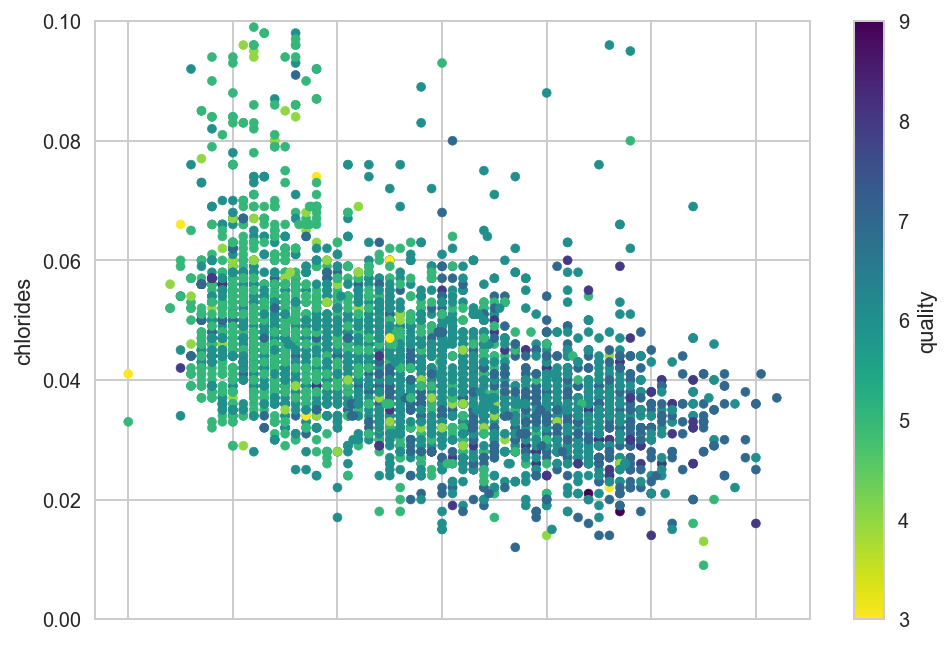

In [20]:
white_wine.plot.scatter('alcohol', 'chlorides', c='quality',
                        cmap='viridis_r', marker='o');
plt.ylim([0., 0.1]);

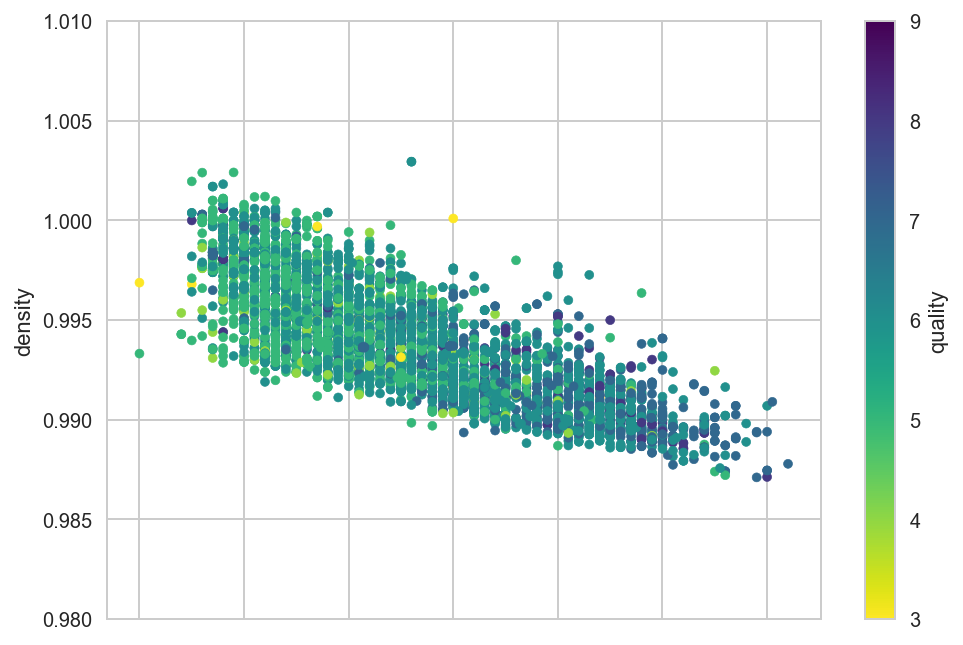

In [21]:
white_wine.plot.scatter('alcohol', 'density', c='quality',
                        cmap='viridis_r', marker='o')
plt.ylim([0.98, 1.01]);

In [22]:
from mpl_toolkits.mplot3d import Axes3D

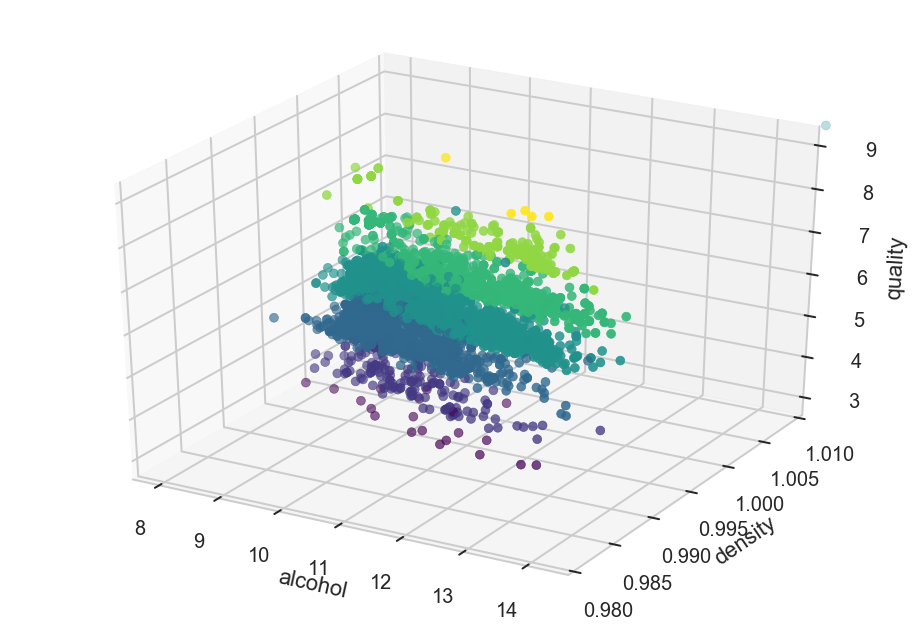

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(white_wine.alcohol, white_wine.density, white_wine.quality,
           c=white_wine.quality, cmap='viridis')

ax.set_ylim([0.98, 1.01])
ax.set_xlabel('alcohol')
ax.set_ylabel('density')
ax.set_zlabel('quality');

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
X = white_wine[['alcohol', 'density']]
X = X.as_matrix()
y = white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    train_size=0.8, random_state=23)

k = 30
#rgr = KNeighborsRegressor(k, weights='distance')
#rgr = MLPRegressor(hidden_layer_sizes=(4,5), activation='tanh', random_state=2,
#                   early_stopping=True, learning_rate_init=0.001, max_iter=400)

rgr = RandomForestRegressor(n_estimators=50, max_depth=3)

rgr.fit(X_train, y_train)
print(k, rgr.score(X_train, y_train), rgr.score(X_test, y_test))

30 0.213002237548 0.226312761399


In [26]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, rgr.predict(X_train)))
print(mean_squared_error(y_test, rgr.predict(X_test)))

0.617000523456
0.607349315833


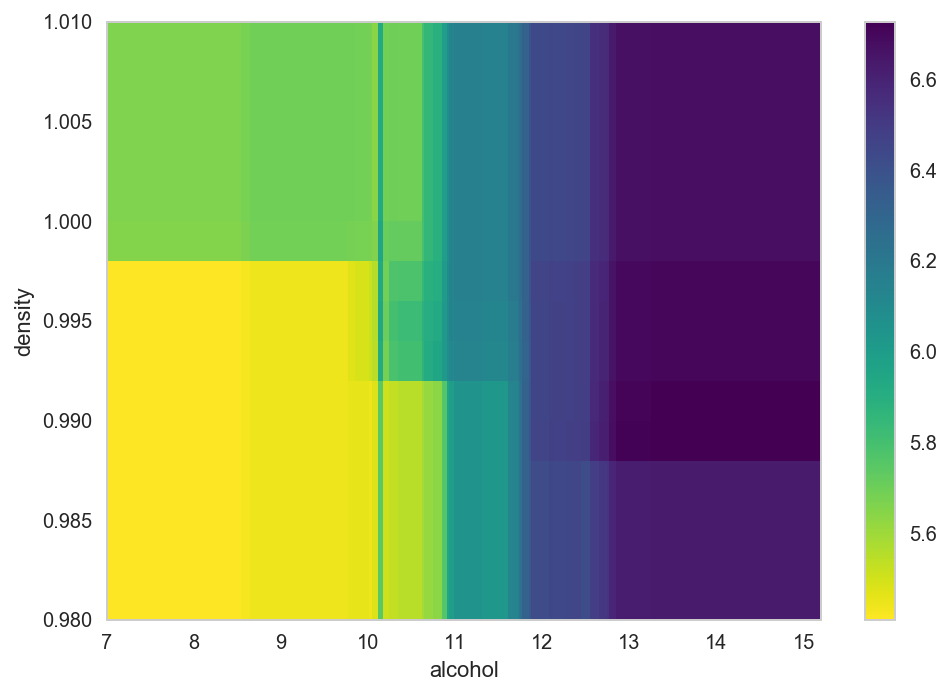

In [27]:
h = 0.002

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max =0.98, 1.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = rgr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='viridis_r')
plt.ylabel('density')
plt.xlabel('alcohol')
plt.colorbar();

In [28]:
from scipy import stats

In [69]:
def midpoint(x):
    return x[0] + (x[1] - x[0])/2
def spread(x):
    return np.power((x[1] - x[0]) / 2., 2)

def beer_gauss(ABV, IBU):
    means = midpoint(ABV), midpoint(IBU)
    cov = ((spread(ABV), 0.), (0, spread(IBU)))
    return stats.multivariate_normal(mean=means, cov=cov)

def beer_score2(points):
    # alcohol and IBU dimensions
    # session beers
    session = beer_gauss((3.5, 5.), (10, 35))
    # american IPA
    american_ipa = beer_gauss((6.3, 7.5), (50,70))
    # american imperial red ale
    american_imperial = beer_gauss((8, 10.6), (55, 85))
    american_wheat_ale = beer_gauss((8.5, 12.2), (45, 85))
    
    # english bitter
    bitter = beer_gauss((3, 4.2), (20, 35))
    
    # belgian pale ale
    belgian_pale_ale = beer_gauss((4, 6), (20, 30))
    # belgian dubble
    belgian_dubble = beer_gauss((6.3, 7.6), (20, 35))
    belgian_triple = beer_gauss((7.1, 10.1), (20, 45))
    # belgian quadruple
    belgian_quad = beer_gauss((7.2, 11.2), (25, 50))
    belgian_golden = beer_gauss((7, 11), (20, 50))
    
    # vienna lager
    vienna_lager = beer_gauss((4.5, 5.5), (22, 28))
    
    # weizen bock
    weizen_bock = beer_gauss((7, 9.5), (15, 35))
    maibock = beer_gauss((6,8), (20,38))
    weizen_dunkel = beer_gauss((4.8, 5.4), (10, 15))
    
    Z = (3 * session.pdf(points) +
        14.2 * american_ipa.pdf(points) +
        2 * american_imperial.pdf(points) +
        15 * american_wheat_ale.pdf(points) +
        5 * bitter.pdf(points) +
        5 * belgian_pale_ale.pdf(points) +
        1 * belgian_dubble.pdf(points) +
        7 * belgian_triple.pdf(points) +
        5 * belgian_quad.pdf(points) +
        6 * belgian_golden.pdf(points) +
        1 * vienna_lager.pdf(points) +
        3.2 * weizen_bock.pdf(points) +
        2 * weizen_dunkel.pdf(points) +
        7 * maibock.pdf(points))
    return Z / np.max(Z)

In [70]:
h = 0.02
xx, yy = np.meshgrid(np.arange(2, 14, h),
                     np.arange(5, 80, h))
Z = beer_score2(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

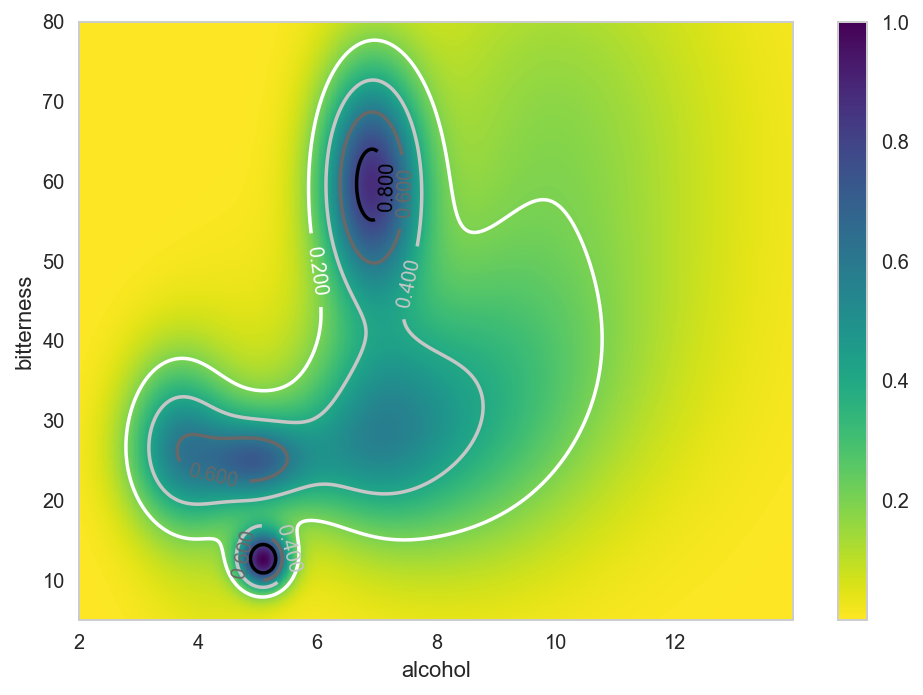

In [73]:
plt.pcolormesh(xx, yy, Z, cmap='viridis_r')
plt.colorbar();
CS = plt.contour(xx, yy, Z, 5)
plt.clabel(CS, inline=1, fontsize=10)

plt.ylabel('bitterness')
plt.xlabel('alcohol');

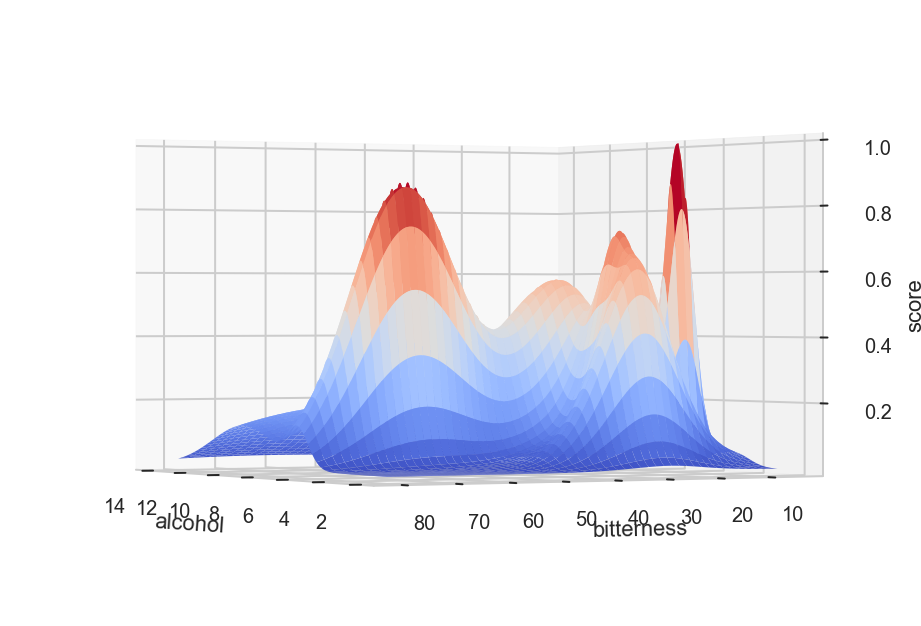

In [74]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.view_init(0, 150)
ax.set_xlabel('alcohol')
ax.set_zlabel('score')
ax.set_ylabel('bitterness');

In [2]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'